In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from dpp.data import load_from_kaggle


/Users/charlotte/Documents/portfolio_project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_link = "jainaru/world-happiness-report-2024-yearly-updated" # World Happiness Report 2024
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw/world-happiness-report-2024-yearly-updated' already exists with files. Skipping download (replace=False).


In [3]:
files

['World-happiness-report-2024.csv', 'World-happiness-report-updated_2024.csv']

Exploration: Historical Data 2005 - 2023

In [7]:
df_all_years = pd.read_csv("/".join(["../data/raw/", dataset_name, files[1]]), encoding='latin1')
print('Data 2005-2023:')
display(df_all_years.head())

Data 2005-2023:


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [8]:
print('Data 2005-2023:')
display(
    "Shape",
    df_all_years.shape,
    "Description",
    df_all_years.describe().round(2),
    "Duplicates",
    df_all_years.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df_all_years.dtypes,
        "Missing Values": df_all_years.isnull().sum(),
        "Unique Values": df_all_years.nunique(),
        "Sample Values": [df_all_years[col].sample(3).tolist() for col in df_all_years.columns]
    })


Data 2005-2023:


'Shape'

(2363, 11)

'Description'

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.00,2363.00,2335.00,2350.00,2300.00,2327.00,2282.00,2238.00,2339.00,2347.00
mean,2014.76,5.48,9.40,0.81,63.40,0.75,0.00,0.74,0.65,0.27
std,5.06,1.13,1.15,0.12,6.84,0.14,0.16,0.18,0.11,0.09
min,2005.00,1.28,5.53,0.23,6.72,0.23,-0.34,0.04,0.18,0.08
25%,2011.00,4.65,8.51,0.74,59.20,0.66,-0.11,0.69,0.57,0.21
50%,2015.00,5.45,9.50,0.83,65.10,0.77,-0.02,0.80,0.66,0.26
75%,2019.00,6.32,10.39,0.90,68.55,0.86,0.09,0.87,0.74,0.33
max,2023.00,8.02,11.68,0.99,74.60,0.98,0.70,0.98,0.88,0.70


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Country name,object,0,165,"[Bahrain, Colombia, Iraq]"
year,int64,0,19,"[2008, 2011, 2007]"
Life Ladder,float64,0,1814,"[5.548, 6.549, 5.326]"
Log GDP per capita,float64,28,1760,"[9.146, 8.98, 10.807]"
Social support,float64,13,484,"[0.856, 0.97, 0.936]"
Healthy life expectancy at birth,float64,63,1126,"[70.64, 65.5, 71.04]"
Freedom to make life choices,float64,36,550,"[0.821, 0.939, 0.64]"
Generosity,float64,81,650,"[-0.042, 0.074, 0.02]"
Perceptions of corruption,float64,125,613,"[0.912, 0.751, 0.835]"
Positive affect,float64,24,442,"[0.548, 0.694, 0.639]"


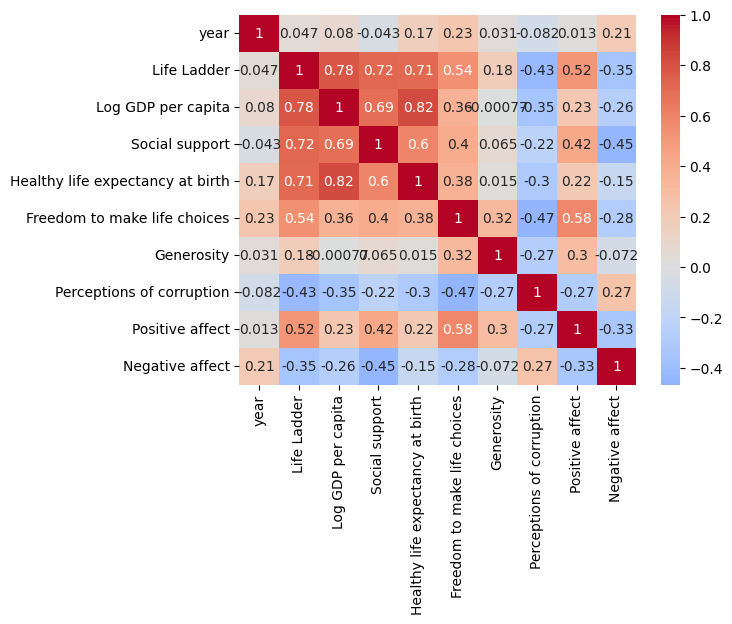

In [6]:
sns.heatmap(df_all_years.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0);

In [14]:
print('Data 2024:')
display(
    "Shape",
    df_2024.shape,
    "Description",
    df_2024.describe().round(2),
    "Duplicates",
    df_2024.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df_2024.dtypes,
        "Missing Values": df_2024.isnull().sum(),
        "Unique Values": df_2024.nunique(),
        "Sample Values": [df_2024[col].sample(3).tolist() for col in df_2024.columns]
    })


Data 2024:


'Shape'

(143, 12)

'Description'

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.00,143.00,143.00,140.00,140.00,140.00,140.00,140.00,140.00,140.00
mean,5.53,5.64,5.41,1.38,1.13,0.52,0.62,0.15,0.15,1.58
std,1.17,1.16,1.19,0.43,0.33,0.16,0.16,0.07,0.13,0.54
min,1.72,1.78,1.67,0.00,0.00,0.00,0.00,0.00,0.00,-0.07
25%,4.73,4.85,4.61,1.08,0.92,0.40,0.53,0.09,0.07,1.31
50%,5.78,5.90,5.67,1.43,1.24,0.55,0.64,0.14,0.12,1.64
75%,6.42,6.51,6.32,1.74,1.38,0.65,0.74,0.19,0.19,1.88
max,7.74,7.82,7.67,2.14,1.62,0.86,0.86,0.40,0.57,3.00


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Country name,object,0,143,"[United Kingdom, Brazil, Iceland]"
Regional indicator,object,0,10,"[Central and Eastern Europe, Western Europe, W..."
Ladder score,float64,0,140,"[6.048, 5.463, 6.284]"
upperwhisker,float64,0,140,"[7.147, 7.051, 7.389]"
lowerwhisker,float64,0,136,"[5.712, 2.904, 4.117]"
Log GDP per capita,float64,3,134,"[1.526, 1.854, 1.262]"
Social support,float64,3,124,"[0.328, 1.392, 1.461]"
Healthy life expectancy,float64,3,119,"[0.639, 0.599, 0.65]"
Freedom to make life choices,float64,3,122,"[0.6, 0.72, 0.631]"
Generosity,float64,3,110,"[0.145, 0.258, 0.135]"


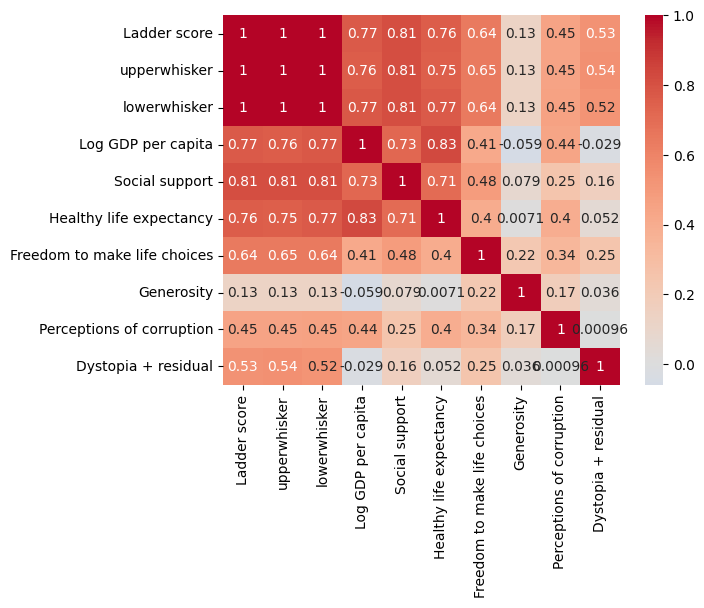

In [15]:
sns.heatmap(df_2024.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0);

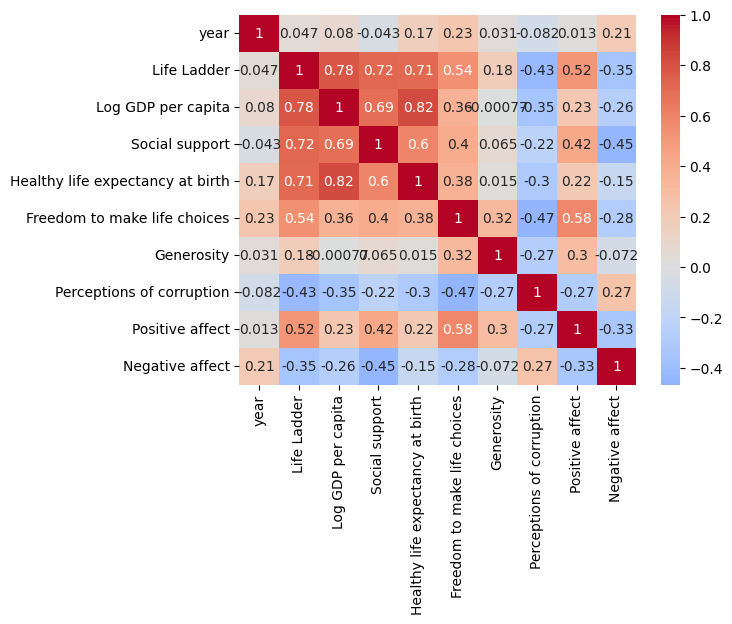

In [17]:
sns.heatmap(df_all_years.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0);

In [ ]:
df_2024 = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df_all_years = pd.read_csv("/".join(["../data/raw/", dataset_name, files[1]]), encoding='latin1')
print('Data 2024:')
display(df_2024.head())
print('Data 2005-2024:')
display(df_all_years.head())